In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import random
import matplotlib.pyplot as plt

In [ ]:
ds_train =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data/traindata")
ds_test =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/traindata")

Found 2249 files belonging to 8 classes.
Found 591 files belonging to 8 classes.


In [ ]:
IMAGE_SIZE=[224,224]

train_path="/content/drive/MyDrive/data/traindata"
valid_path="/content/drive/MyDrive/dataset/traindata"

In [ ]:
model=Sequential()
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu', input_shape=(224,224,3)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu'))

model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu'))

model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu'))

model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dense(units=120, activation='relu'))

model.add(Flatten())

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=8, activation='softmax'))


model.compile(optimizer= 'adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
model.build()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 average_pooling2d (Average  (None, 110, 110, 6)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 6)       906       
                                                                 
 average_pooling2d_1 (Avera  (None, 53, 53, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 6)         906       
                                                                 
 average_pooling2d_2 (Avera  (None, 24, 24, 6)         0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/data/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 2249 images belonging to 8 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 591 images belonging to 8 classes.


In [ ]:
history=model.fit(training_set,epochs = 10,batch_size=16,validation_data=test_set)

Epoch 1/10
141/141 [==============================] - 626s 4s/step - loss: 1.9975 - accuracy: 0.1948 - val_loss: 1.8367 - val_accuracy: 0.2961
Epoch 2/10
141/141 [==============================] - 132s 930ms/step - loss: 1.6297 - accuracy: 0.4006 - val_loss: 1.4041 - val_accuracy: 0.5093
Epoch 3/10
141/141 [==============================] - 131s 928ms/step - loss: 1.2273 - accuracy: 0.5740 - val_loss: 0.9334 - val_accuracy: 0.7090
Epoch 4/10
141/141 [==============================] - 131s 930ms/step - loss: 0.9151 - accuracy: 0.7056 - val_loss: 0.7143 - val_accuracy: 0.8206
Epoch 5/10
141/141 [==============================] - 129s 912ms/step - loss: 0.6848 - accuracy: 0.7821 - val_loss: 0.4606 - val_accuracy: 0.8968
Epoch 6/10
141/141 [==============================] - 134s 947ms/step - loss: 0.5945 - accuracy: 0.8070 - val_loss: 0.4571 - val_accuracy: 0.9154
Epoch 7/10
141/141 [==============================] - 139s 983ms/step - loss: 0.3933 - accuracy: 0.8791 - val_loss: 0.4460 - va

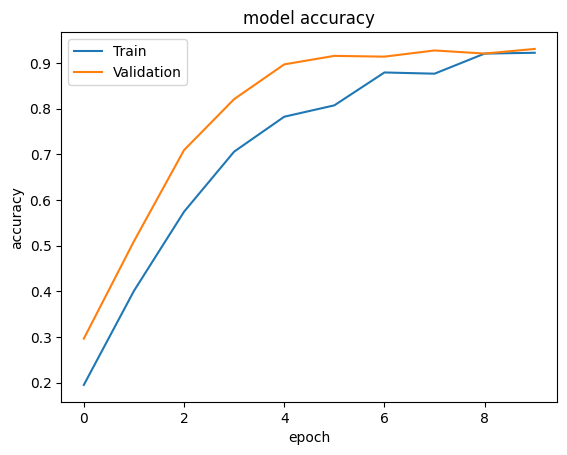

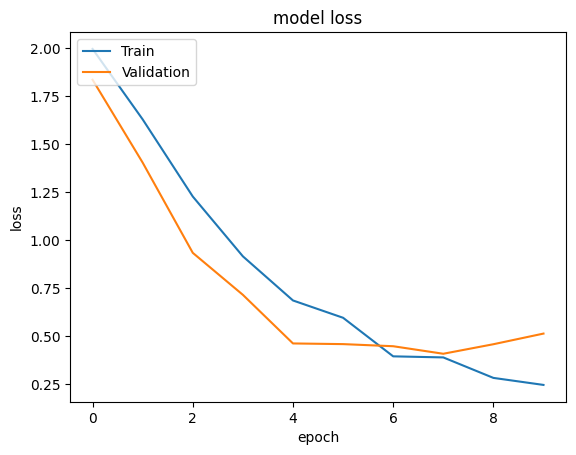

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

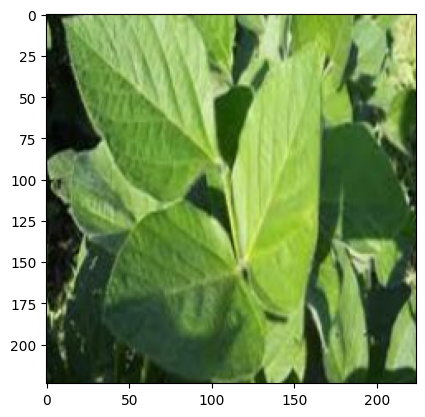

1/1 [==============================] - 2s 2s/step
predicted class index: healthy leaf


In [ ]:
idx2 = random.randint(0,len(training_set)-1)

image_array,label = training_set[idx2]

plt.imshow(image_array[0])
plt.show()

predictions = model.predict(image_array)

predicted_class_index = np.argmax(predictions[0])

class_name=["copper deficiency","healthy leaf","iron deficiency","magnesium deficiency","molybdenum deficiency","nitrogen deficiency","phosphorous deficiency","pottassium deficiency"]

print("predicted class index:" ,class_name[predicted_class_index])

In [ ]:
tf.keras.models.save_model(model,'alexnet.hdf5')

<ipython-input-18-9207c3acb598>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'inceptionv3.hdf5')
